# RSA! 
... real quick.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

# pycortex, because fancy
import cortex as cx

# Distance functions
from scipy.spatial import distance as scidist

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load data
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/s01_color_natims_data.hdf') as hf:
    val = hf['val'].value
    mask = hf['mask'].value

In [5]:
val.shape

(126, 65242)

In [3]:
# Load ROI masks
subject, transform = 's01', 'color_natims'
roi_masks = cx.get_roi_masks(subject, transform, roi_list=['V1', 'V2', 'PPA', 'FFA'])

Cutting 4 overlapping voxels (should be < ~50)


In [8]:
roi_masks['FFA'].shape

(25, 104, 104)

In [4]:
# Load models
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/color_natims_features_19cat.hdf') as hf:
    Xsem = hf['val'].value
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/color_natims_features_fft.hdf') as hf:
    Xfft = hf['val'].value    

In [9]:
Xsem.shape

(126, 19)

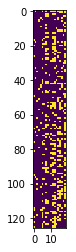

In [11]:
plt.imshow(Xsem)

In [14]:
# Select voxels in each ROI
val_masked = {}
rois = ['V1','FFA','PPA']
for m in rois:
    tmp_mask = roi_masks[m][mask]
    val_masked[m] = val[:, tmp_mask]

In [15]:
tmp_mask.shape

(65242,)

In [17]:
m

'PPA'

In [16]:
val_masked[m].shape

(126, 233)

In [18]:
val_masked['FFA'].shape

(126, 150)

In [19]:
d_ffa = scidist.pdist(val_masked['FFA'], metric='euclidean')

In [20]:
d_ffa.shape

(7875,)

In [21]:
d_ffa = scidist.squareform(d_ffa)
d_ffa.shape

(126, 126)

In [22]:
# Compute a single RDM for V1
d_ffa = scidist.pdist(val_masked['FFA'], metric='euclidean')
d_ffa = scidist.squareform(d_ffa)
# Compute an RDM for the 19-category semantic model
d_sem = scidist.pdist(Xsem, metric='euclidean')
d_sem = scidist.squareform(d_sem)

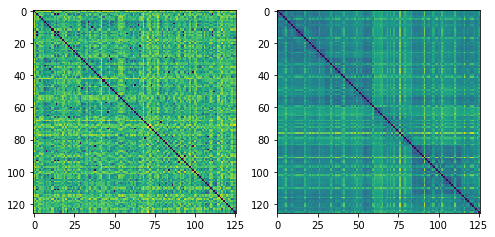

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(d_sem)
axs[1].imshow(d_ffa)

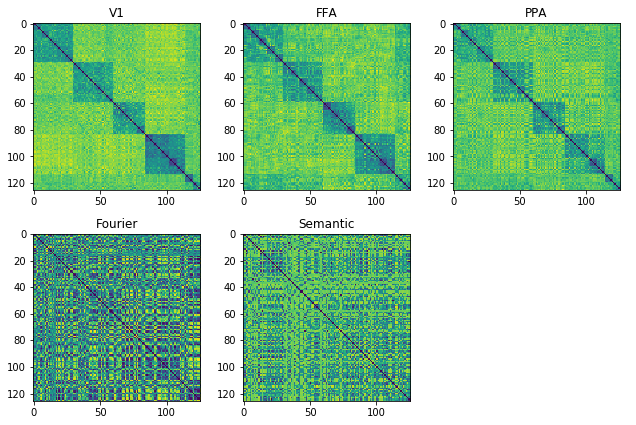

In [25]:
metric = 'correlation'
# Same for all models, ROIs
fig, axs = plt.subplots(2, 3, figsize=(9,6))
for roi, ax in zip(rois, axs[0]):
    d = scidist.pdist(val_masked[roi], metric=metric)
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(roi)

for model, modelname, ax in zip([Xfft, Xsem], ['Fourier', 'Semantic'], axs[1]):
    d = scidist.pdist(model, metric=metric)
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(modelname)
axs[1,2].axis('off')
plt.tight_layout()

# When do rank-order and Pearson correlation differ? 

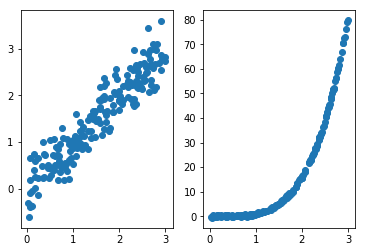

In [27]:
# (When scales of differences differ)
from scipy.stats import spearmanr
x = np.random.rand(200,) * 3
noise = np.random.randn(200,) * 0.3
y = x + noise
y_nl = x**4 + noise
fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y)
ax[1].scatter(x, y_nl)

In [28]:
print(np.corrcoef(x, y)[0,1])
print(np.corrcoef(x, y_nl)[0,1])

0.939774883921043
0.8715293602151928


In [29]:
print(spearmanr(x, y)[0])
print(spearmanr(x, y_nl)[0])

0.9399234980874523
0.9838835970899273
